# Loan-Payback-Prediction-Model


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [44]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [46]:
df[["loan_status"]].value_counts()

loan_status
PAIDOFF        260
COLLECTION      86
Name: count, dtype: int64

In [47]:
df.describe(include = "all")

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,7,23,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,166,90,NaN,151,294
mean,202.167630,202.167630,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,107.250000,107.250000,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,204.500000,204.500000,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,298.750000,298.750000,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


## Convert to date time object

In [49]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## Data visualization and pre-processing

In [51]:
df['loan_status'].value_counts()

loan_status
PAIDOFF       260
COLLECTION     86
Name: count, dtype: int64

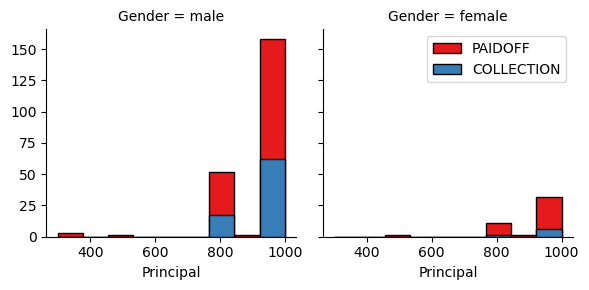

In [53]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

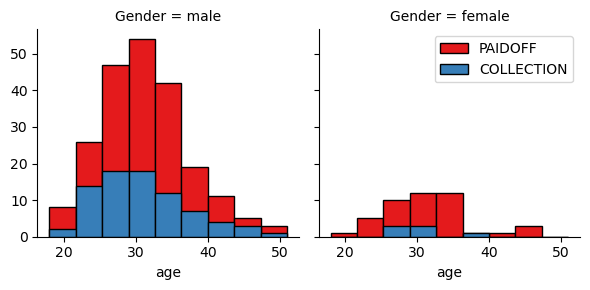

In [55]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Pre-processing: Feature selection/extraction

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0.1    346 non-null    int64         
 1   Unnamed: 0      346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


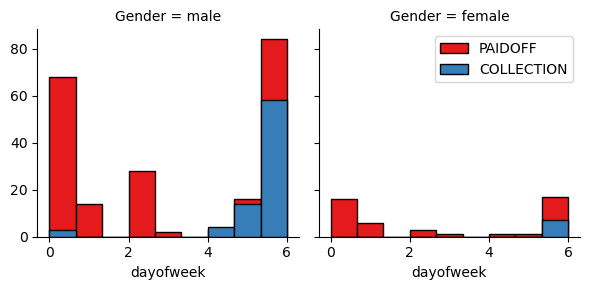

In [59]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [61]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

In [63]:
## Taking a look at gender 

df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: proportion, dtype: float64

In [65]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
df.head()

/var/folders/v8/ndycgfy14zl75001pgl6hwqr0000gn/T/ipykernel_24244/3962139295.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
/var/folders/v8/ndycgfy14zl75001pgl6hwqr0000gn/T/ipykernel_24244/3962139295.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding
### How about education?

In [67]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: proportion, dtype: float64

### Feature before One Hot Encoding

In [69]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [71]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,False,True,False
1,1000,30,33,1,0,True,False,False
2,1000,15,27,0,0,False,False,True
3,1000,30,28,1,1,False,False,True
4,1000,30,29,0,1,False,False,True


### Feature selection

In [73]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,False,True,False
1,1000,30,33,1,0,True,False,False
2,1000,15,27,0,0,False,False,True
3,1000,30,28,1,1,False,False,True
4,1000,30,29,0,1,False,False,True


In [75]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

(array([[  0.,   0.,   0.,   3.,   0.,   2.,   0.,   0.,  81., 260.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 8 BarContainer objects>)

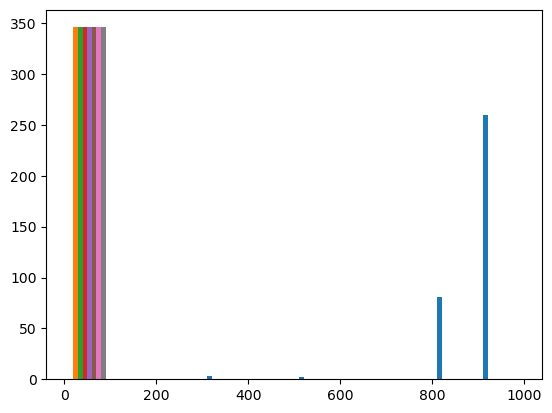

In [77]:
plt.hist(X)

## Normalize Data

In [79]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

(array([[  3.,   2.,   0.,   0.,  81.,   2., 258.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  14., 148.,   0., 184.,   0.,   0.],
        [  0.,   0.,   0.,   0.,  26., 108., 124.,  57.,  24.,   7.],
        [  0.,   0.,   0.,   0.,   0., 294.,   0.,   0.,  52.,   0.],
        [  0.,   0.,   0.,   0.,   0., 141.,   0., 205.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., 302.,   0.,   0.,   0.,  44.],
        [  0.,   0.,   0.,   0.,   0., 195.,   0., 151.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0., 197.,   0., 149.,   0.,   0.]]),
 array([-5.89052444, -4.96882824, -4.04713204, -3.12543584, -2.20373963,
        -1.28204343, -0.36034723,  0.56134897,  1.48304517,  2.40474138,
         3.32643758]),
 <a list of 8 BarContainer objects>)

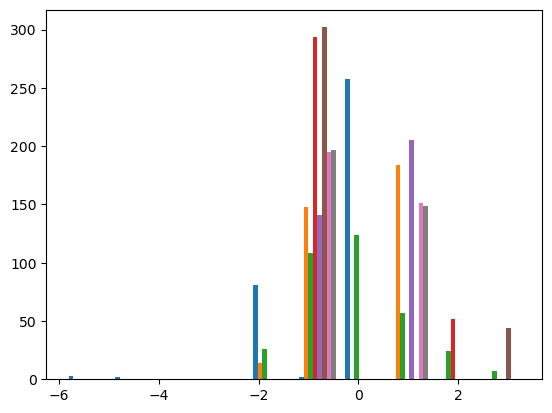

In [81]:
plt.hist(X)

## Classification

#### Using the test set to report the accuracy of the model, I used the following algorithm:

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression


In [83]:
# Evaluation Metrices
from sklearn.metrics import f1_score, log_loss

In [85]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

## K Nearest Neighbor(KNN)¶
#### Notice: You should find the best k to build the model with the best accuracy.


In [87]:
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [93]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

ks = range(1, 10)
mean_accuracy = []

for n in ks:
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))

In [90]:
for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i+1, mean_accuracy[i]))

k = 1 has a Score = 0.6428571428571429 
k = 2 has a Score = 0.5142857142857142 
k = 3 has a Score = 0.7142857142857143 
k = 4 has a Score = 0.6285714285714286 
k = 5 has a Score = 0.7714285714285715 
k = 6 has a Score = 0.6714285714285714 
k = 7 has a Score = 0.7571428571428571 
k = 8 has a Score = 0.7285714285714285 
k = 9 has a Score = 0.7142857142857143 


Text(0, 0.5, 'Testing Accuracy Values')

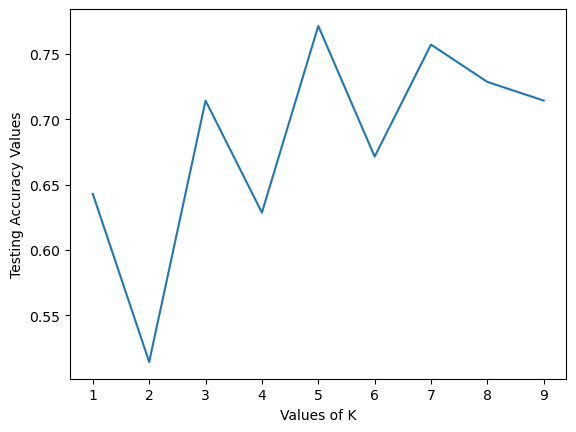

In [95]:
# Relation between k's and their respective accuracies

plt.plot(ks, mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')

In [97]:
# Final Model with best value of k

knn_model = knn(n_neighbors = 7)
knn_model.fit(X_train, y_train)
knn_yhat = knn_model.predict(X_test)

knn_model

KNeighborsClassifier(n_neighbors=7)

## Decision Tree

In [104]:
# Libraries
from sklearn.tree import DecisionTreeClassifier 
# from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [109]:
depth_range = range(1, 10)
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted'))

In [113]:
# Creating a df to check the best value of max_depth

result = pd.DataFrame([ f1_score_], index = ['F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9'])
result.columns.name = 'Evaluation Metrices'
result

Evaluation Metrices,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9
F1,0.750893,0.750893,0.736508,0.69476,0.657958,0.676571,0.722768,0.740048,0.742857


In [115]:
# Main Model

dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)
dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier(max_depth=2)

## Support Vector Machine

In [119]:
# Libraries

from sklearn.svm import SVC 
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
kernel_func = ['sigmoid', 'poly', 'rbf', 'linear']
accuracy_score = []

for k in kernel_func:
    svc_model = SVC(C = 0.01, gamma = 'auto', kernel = k)
    svc_model.fit(X_train, y_train)
    svc_yhat = svc_model.predict(X_test)
    accuracy_score.append(f1_score(y_test, svc_yhat, average = 'weighted'))

Text(0, 0.5, 'Accuracy')

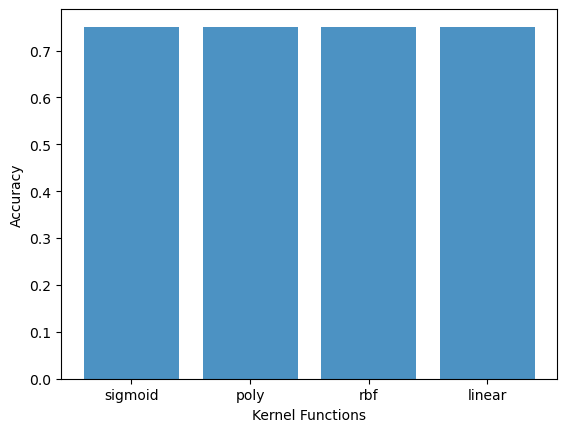

In [125]:
# Visualization of best kernel

y_pos = np.arange(len(kernel_func))
plt.bar(y_pos, accuracy_score, align='center', alpha = 0.8)
plt.xticks(y_pos, kernel_func)
plt.xlabel('Kernel Functions')
plt.ylabel('Accuracy')

In [127]:
svc_model = SVC(C = 0.01, gamma = 'auto', kernel = 'poly')
svc_model.fit(X_train, y_train)
svc_model

SVC(C=0.01, gamma='auto', kernel='poly')

## Logistic Regression

In [129]:
# Libraries

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score.append(log_loss(y_test, y_prob))
                              
    print('\n')

Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.4343518515545853
Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.4343628319082611
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.4549507341538283
Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.43438004194788193
Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.4343744715937329


Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.4528964329879503
Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.45290451764215717
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.5596633457155463
Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.4529140633268567
Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.4528996396300586


Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.4787023942592035
Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.47870264955532216
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.6685399066061889
Test 14: Accuracy at C = 0.00

Text(0, 0.5, 'Testing Accuracy')

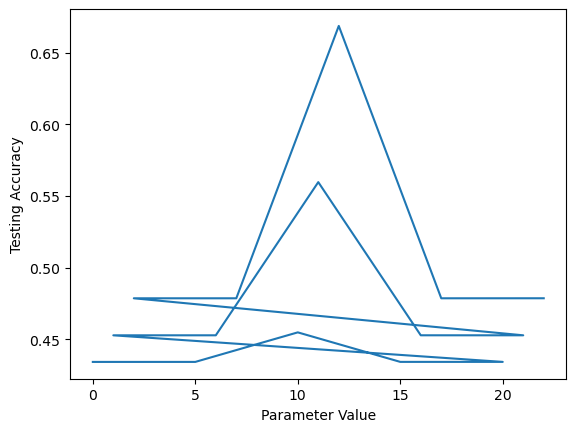

In [133]:
# Visualization

lr_prob = lr_model.predict_proba(X_test)
log_loss(y_test, lr_prob)
plt.plot(index, accuracy_score)
plt.xlabel('Parameter Value')
plt.ylabel('Testing Accuracy')

In [135]:
# Main Model

from sklearn.linear_model import LogisticRegression 

lr_model = LogisticRegression(C = 0.001, solver = 'liblinear')
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(C=0.001, solver='liblinear')

## Model Evaluation using Test set

In [139]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss